In [50]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

from LoadMultiFiles import LoadOneFileUproot
from glob import glob
import os
# path_file = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/proton_no_optical_30_250.root"
path_file = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/try_save_information.root"

dir_events = LoadOneFileUproot(path_file,
                               name_branch="GdLS_log",return_list=False)
dir_geninfo = LoadOneFileUproot(path_file,
                               name_branch="genInfo",return_list=False)

In [51]:
from importlib import reload
import FunctionFor_dE_dx
reload(FunctionFor_dE_dx)
from FunctionFor_dE_dx import GetDirForNoOpticalAnalyze
pdgID_certain,dir_analysis = GetDirForNoOpticalAnalyze(dir_events, dir_geninfo)

Text(0.5, 0, 'dE/dx [ MeV/mm ]')

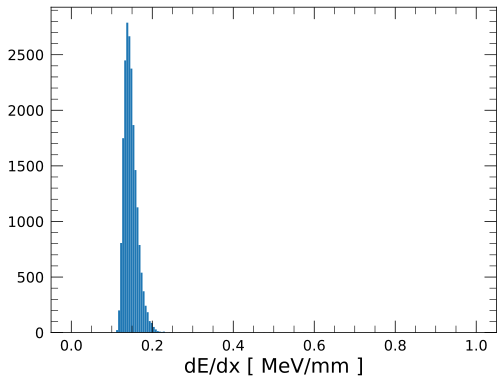

In [52]:
plt.hist(dir_analysis["dE_dx"],bins=np.linspace(0,1,200))
plt.xlabel("dE/dx [ MeV/mm ]")

[0.5009214254554185, 0.46120947719761934, 0.44537766854389543, 0.5884913120862619, 0.41340327918620634, 0.43466108802985526, 0.3801409035032851, 0.3951045616346455, 0.7849611270417982, 0.3829256063099312] [0.5009214254553171, 0.46120947719759897, 0.44537766854386973, 0.7183441321923933, 0.413403279186241, 0.4346610880297703, 0.38014090350338847, 0.3951045616347528, 1.1282273579669873, 0.38292560630998196]


[]

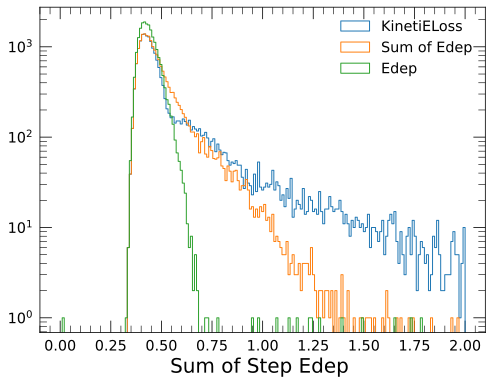

In [53]:
v_events_Edep = []
v_events_KinetiE = []
for v_Edep,v_DeltaE in zip(dir_events["step_Edep"],dir_events["step_DeltaKineticE"]):
    v_events_Edep.append(np.sum(v_Edep))
    v_events_KinetiE.append(-np.sum(v_DeltaE))
print(v_events_Edep[:10],v_events_KinetiE[:10])
plt.hist(v_events_KinetiE,bins=np.linspace(0,2,200),histtype="step",label="KinetiELoss")
plt.hist(v_events_Edep,bins=np.linspace(0,2,200),histtype="step",label="Sum of Edep")
plt.hist(dir_analysis["Edep"],bins=np.linspace(0,2,200),histtype="step",label="Edep")
plt.legend()
plt.xlabel("Sum of Step Edep ")
plt.semilogy()

Counter({False: 17649, True: 2351})
Counter({False: 15819, True: 4181})


Text(0, 0.5, 'Sum of Proton steps Edep')

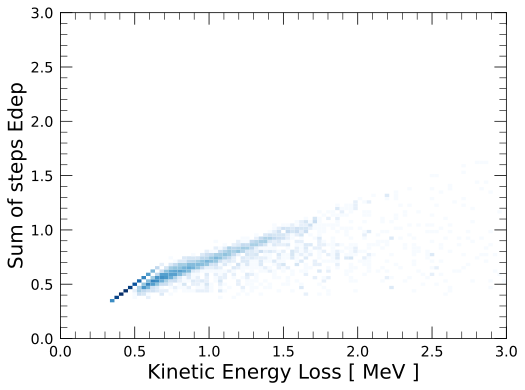

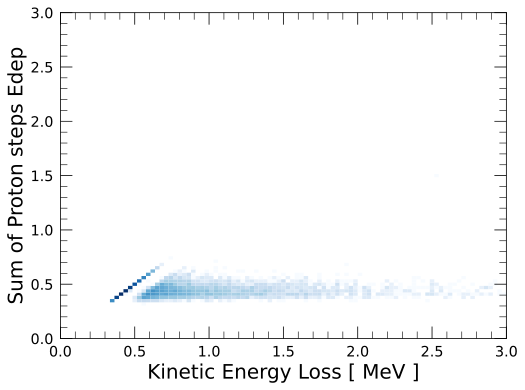

In [55]:
from matplotlib.colors import LogNorm
from collections import Counter
v_events_KinetiE = np.array(v_events_KinetiE)
v_events_Edep = np.array(v_events_Edep)
print(Counter(np.abs(v_events_Edep[dir_analysis["index"]]-v_events_KinetiE[dir_analysis["index"]])>0.2))
print(Counter(np.abs(v_events_KinetiE[dir_analysis["index"]]-dir_analysis["Edep"])>0.2))
plt.hist2d(v_events_KinetiE,v_events_Edep,bins=(np.linspace(0,3,100), np.linspace(0,3,100)),cmap="Blues",norm=LogNorm())
plt.xlabel("Kinetic Energy Loss [ MeV ]")
plt.ylabel("Sum of steps Edep")

plt.figure()
plt.hist2d(v_events_KinetiE[dir_analysis["index"]],dir_analysis["Edep"],bins=(np.linspace(0,3,100), np.linspace(0,3,100)),cmap="Blues",norm=LogNorm())
plt.xlabel("Kinetic Energy Loss [ MeV ]")
plt.ylabel("Sum of Proton steps Edep")